✅ Accuracy: 0.6987522281639929
✅ AUC: 0.6419386460615846
✅ Confusion Matrix:
 [[364  13]
 [156  28]]


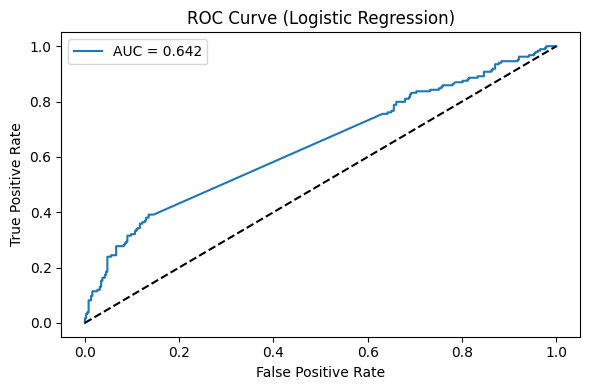

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_excel("CACS_model_ready_imputed.xlsx")

# 2. 목표 변수 이진화: CACS ≥ 100 → 1, else 0
df["CACS_binary"] = (df["CACS"] >= 100).astype(int)

# 3. 독립 변수 / 종속 변수 분리
X = df.drop(columns=["CACS", "CACS_binary"])
y = df["CACS_binary"]

# 4. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 7. 결과 출력
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ AUC:", roc_auc_score(y_test, y_proba))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.tight_layout()
plt.show()
